## Example From Hands On ML Book

### Look At The Big Picture

It helps to have a checklist of what you will go through and do. Example: 
* frame problem and look at big picture
* get data
* explore the data to get insights
* prepare the data to better expose the underlying patterns to ML algorithms
* explore many different models and shortlist the best ones
* fine tune your models and combine them into a great solution
* present your solution
* launch, monitor, and maintain your system


Big picture in this case is what is the objective? even though they might say they want a model, what they use it for is important and will have impact on how the problem is framed, what model is selected, performance metrics used and how much effort is spent tweaking the model.

For this dataset and model we happen to know that the prediction of housing prices will be fed to another ML system with other signals in order to determine whether the area is worth looking into and the model accuracy will have a direct impact on company revenue.

another important thing to consider is how things are working right now. there might be insight to glean from this too such as how much better you can expect performance to get, what has already been tried, etc.

consider whether the problem is a supervised, unsupervised, semi-supervised, or reinforcement learning problem. Also consider whether or not you want it to be a batch or online learning system and whether it is classification, regression or some other type of task. 

things to consider for batch vs online, whether there is continuous data being fed into the system, whether you have the need to adjust quickly to changes in the data, and whether or not the data is small enough to fit into memory. 

### performance measure

this would be something like root mean squared error (RMSE) for a regression problem, maybe cross entropy or somethign else depending on the type of task you are doing.

these amount to distance measures between the vector of predicted values and the vector of target values

the RMSE is a measure of the euclidean norm, or euclidean distance betweeen the vectors. this is called the l2 norm. this is the straight line distance length
for measn absolute error, that is the l1 norm, also known as the manhattan norm because it's distance is like that of a distance where you are on a grid and can't move diagonally
generally the norms for l can go lower than 1 and up to infinite, and as they get larger, they care more and more about distances between vectors that are large and less about small distances. So RMSE is more sensitive to outliers than MAE but performs better if the distribution is gaussian.

### check assumptions

Just a placeholder to make sure that anything you have read into and provided an explanation for should be reexamined. an example of this could be assuming you need to use regression when classification is the better option based on how the predictions of the model will be used.



### Get The Data

In [1]:
import sys
assert sys.version_info >= (3,7)

In [2]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

In [3]:
# attribution here this code is coming from the hands on ml book companion repository for 3rd edition of the book
# https://github.com/ageron/handson-ml3/

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### Explore and visualize the data to gain insights

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


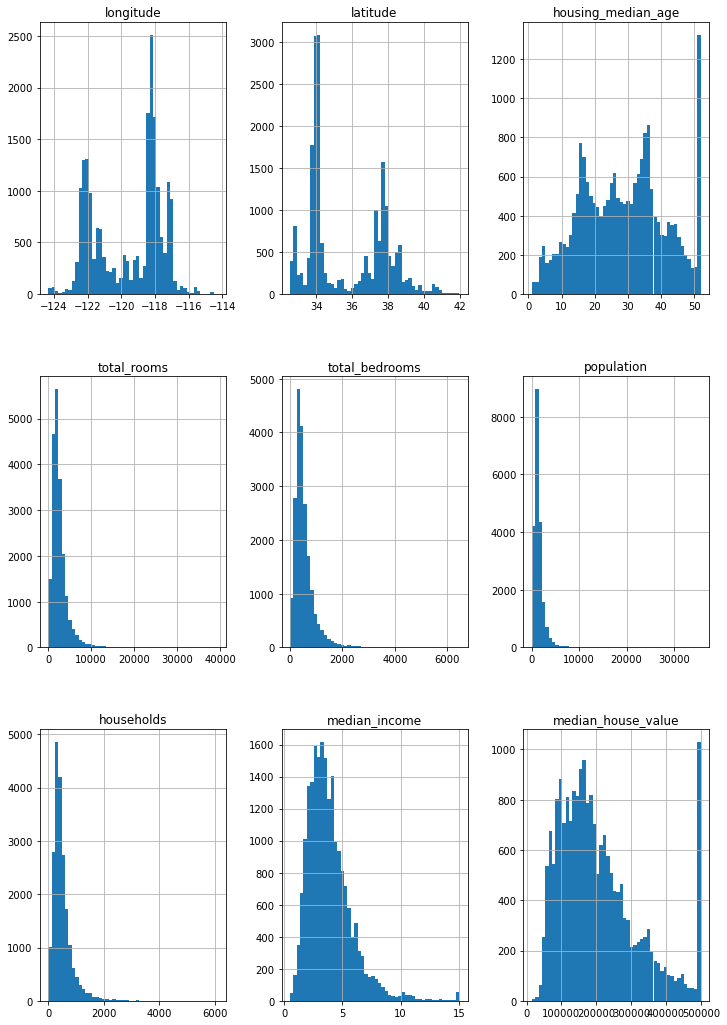

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,18))
plt.show()

### Create A Test Set

you do this before getting too far into your exploratory data analysis, because if you start to detect patterns that bias you you won't realize it, they will impact your model selection and your confidence about generalization. Best to only look at the training dataset first.

In [9]:
import numpy as np 

# this function also from the hands on ml book 3rd edition Geron Aurelien
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)

print(len(train_set))

print(len(test_set))

16512
4128


#### A Better Way To Split the test set out

We want to be able to repeatedly split up the training and test set, even if new data is added, in such a way that the same data always ends up in each group, but is also as random as can be managed. the above method won't work because it will create a new random group every time so data will migrate back and forth between the test and train set. Seeding the randomization will help, but only if the dataset remains the same and doesn't have new data added to it or any data removed from it. In order to make sure once data has been added to a train or test set it stays there even if the overall dataset grows or shrinks, a technique that is often used os to do a hash of the id of the field and check if that hash is within the desired ratio. in this case, the same observations should always be ending up in the same splits.

In [10]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    """ 
        This uses the crc32 bit hash algorithm of the identifier and then compares the test ratio to the most significant bit by shifting it left 32 places 
    """
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    # get the id, look below and you will see that the was created by reset_index
    ids = data[id_column]
    # make a whole column of boolean indicating whether each row's id is in the test set
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    # split out the train and test sets
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
# since there is no identifier in the dataset itself, we use the row id of the housing dataframe as the identifier to hash with
housing_with_id = housing.reset_index() # reset_index will save the old index into a column with name "index"
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

# this strategy is risky, because if rows get deleted or added before the end you could change the index of the incoming data each time you alter the dataset.


In [13]:
# you can only use the row index if you have control to only add future rows to the end and not delete rows from your dataset. Otherwise, Pick stable features and make them into an id
# done here with lat long

# uncomment to use these instead:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

#### SKLearn options for train test split

There are a few options. train_test_split() is the most popular, and it will be familiar because it is essentially what is done in the first method covered, shuffle_and_split_data(), where we randomized the order of the indices first and then split the dataset at that point. Note that this doesn't use the hashing strategy to have the dataset split be consistent for future changes. However, you do get the option of a random_state parameter that lets you set the seed for randomizing the data. but, as was discussed before, even if the randomization is consistent every time it doesn't account for changes to the dataset like insertions or deletions from the middle. train_test_split will also split two datasets in the same place, so for instance you can make sure your test data matches up with a separate labels dataset becuase the same indices for the  test observations and labels will be split out from both of these datasets.

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # this is all still from the hands on ML book. . . someone read Hitchiker's Guide :) 

#### A Note About Stratified Sampling

If the datset isn't large enough, or if there is something about it that makes it not representative of the whole population, selecting at random may not be good, because there is a higher chance that the sampling will only be from one part of the population and therefore be biased towards the characteristics common to that portion. Stratified sampling is then a technique that is often used, in which information known about the entire population is used to attempt to sample percentages of characteristics that is more representative.

### Prepare the data for machine learning algorithms

### Select Model and train it

### Fine tune your model

### Present Solution

### Launch, Monitor, Maintain Your System